# Data Cleaning

Avant de pouvoir réellement analyser les données et les utiliser il va falloir les traiter.  
La partie "Nettoyage des données" consiste à ...  

- Traiter les données manquantes
- Regrouper/supprimer les données inutiles
- Supprimer les doublons
- Convertir au maximum du raisonable les string en int/float

In [1]:
# importation des libs/datasets...
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('./dataset/immo_collect.csv')
df.head()

,Unnamed: 0,Lien,Prix,Type de propriété,Vente publique,Immeuble de rapport,Bien neuf,Code Postal,Ville,Sous-type de propriété,...,Type de cuisine,Feu ouvert,Meublé,Jardin,Surface du jardin,Terrasse,Surface de la terrasse,Surface totale du terrain,Piscine,Surface de la zone constructible
0,0,https://www.immoweb.be/fr/annonce/appartement/...,280000,Appartement,False,False,True,1180,Uccle,Appartement,...,Hyper équipée,False,False,True,25.0,True,12.0,None,False,None
1,1,https://www.immoweb.be/fr/annonce/appartement/...,282500,Appartement,False,False,True,1180,Uccle,Appartement,...,Américaine hyper-équipée,False,False,False,None,True,5.0,None,False,None
2,2,https://www.immoweb.be/fr/annonce/appartement/...,412500,Appartement,False,False,True,1180,Uccle,Appartement,...,Américaine hyper-équipée,False,False,False,None,True,15.0,None,False,None
3,3,https://www.immoweb.be/fr/annonce/appartement/...,380000,Appartement,False,False,True,1160,Auderghem,Appartement,...,Hyper équipée,False,False,False,None,True,13.0,None,False,87.0
4,4,https://www.immoweb.be/fr/annonce/appartement/...,165000,Appartement,False,False,True,6000,Charleroi,Appartement,...,Hyper équipée,False,False,False,None,False,None,None,False,None


In [2]:
df.shape

(18201, 24)

In [3]:
df.dtypes

Unnamed: 0                           int64
Lien                                object
Prix                                object
Type de propriété                   object
Vente publique                        bool
Immeuble de rapport                   bool
Bien neuf                             bool
Code Postal                          int64
Ville                               object
Sous-type de propriété              object
Nombre de façades                   object
Etat du bâtiment                    object
Surface habitable                   object
Nombre de chambre(s)                object
Type de cuisine                     object
Feu ouvert                            bool
Meublé                                bool
Jardin                                bool
Surface du jardin                   object
Terrasse                              bool
Surface de la terrasse              object
Surface totale du terrain           object
Piscine                               bool
Surface de 

In [4]:
df.describe(include='object')

,Lien,Prix,Type de propriété,Ville,Sous-type de propriété,Nombre de façades,Etat du bâtiment,Surface habitable,Nombre de chambre(s),Type de cuisine,Surface du jardin,Surface de la terrasse,Surface totale du terrain,Surface de la zone constructible
count,18201,18201,18201,18201,18201,18201,18201,18201,18201,18201,18201,18201,18201,18201
unique,18201,2160,2,2242,25,10,7,1099,52,9,803,194,3062,411
top,https://www.immoweb.be/fr/annonce/loft/a-vendr...,295000,Maison,Uccle,Maison,None,Excellent état,None,3,Équipée,None,None,None,None
freq,1,221,9640,530,6679,5514,5898,2316,3956,6205,14880,11195,9512,16343


In [5]:
df.describe(include='bool')

,Vente publique,Immeuble de rapport,Bien neuf,Feu ouvert,Meublé,Jardin,Terrasse,Piscine
count,18201,18201,18201,18201,18201,18201,18201,18201
unique,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,True,False
freq,17374,17350,16127,17227,17646,12579,11267,17621


In [6]:
# Affichage des valeurs manquantes
df.isna().sum()

Unnamed: 0                          0
Lien                                0
Prix                                0
Type de propriété                   0
Vente publique                      0
Immeuble de rapport                 0
Bien neuf                           0
Code Postal                         0
Ville                               0
Sous-type de propriété              0
Nombre de façades                   0
Etat du bâtiment                    0
Surface habitable                   0
Nombre de chambre(s)                0
Type de cuisine                     0
Feu ouvert                          0
Meublé                              0
Jardin                              0
Surface du jardin                   0
Terrasse                            0
Surface de la terrasse              0
Surface totale du terrain           0
Piscine                             0
Surface de la zone constructible    0
dtype: int64

Z'est partit !

In [7]:
# On commence par la suppression des doublons
df.drop_duplicates(inplace=True)

In [8]:
# On peu ensuite supprimer les collonnes inutiles comme les liens ici par exemple
df.drop(columns=['Lien'],inplace=True)

Le describe m'a permis de voir que beaucoups de mes données était sous la forme 'object' (string)  
Et qu'il existait, entre autre, trop de "Nombre de chambre(s)" différents 

On va donc s'attaquer à cela ici pour la démo
### Nettoyage de la collonne "Nombre de chambre(s)"

In [9]:
# Nombre de fois ou les différentes valeurs sont entrées
df['Nombre de chambre(s)'].value_counts()

3        3956
2        3023
2.0      2427
4        2021
3.0      1866
1.0       966
5         911
1         770
4.0       653
6         407
None      356
5.0       267
7         146
6.0       125
8          68
7.0        42
10         33
9          33
11         23
8.0        21
10.0       14
9.0        12
12          9
15          5
13          5
12.0        4
14.0        3
204.0       3
18          3
15.0        2
24          2
41          2
49.0        2
17          2
20          2
165.0       1
20.0        1
16.0        1
14          1
18.0        1
65          1
13.0        1
22          1
11.0        1
25          1
34          1
21          1
44          1
19          1
16          1
30          1
60.0        1
Name: Nombre de chambre(s), dtype: int64

In [10]:
# Suppression des lignes ou le nombres de chambre n'est pas indiqué
print(df.shape)
df = df[(df['Nombre de chambre(s)'] != 'None')]
print(df.shape)

(18201, 23)
(17845, 23)


In [11]:
def transform_to_int(element):
    """
    Essaye de transformer un element en integer
    Si pas, cela return un np.nan (non attribuate number)
    """
    try:
        transformed = int(float(element))
    except:
        transformed = np.nan
    finally:
        return transformed

# Transformation des strings en int
df['Nombre de chambre(s)'] = df['Nombre de chambre(s)'].apply(transform_to_int)

In [12]:
print(df['Nombre de chambre(s)'][0].dtype)
df['Nombre de chambre(s)'][0]
df['Nombre de chambre(s)'].value_counts().head(10)

int64


3     5822
2     5450
4     2674
1     1736
5     1178
6      532
7      188
8       89
10      47
9       45
Name: Nombre de chambre(s), dtype: int64

<AxesSubplot:xlabel='Nombre de chambre(s)'>

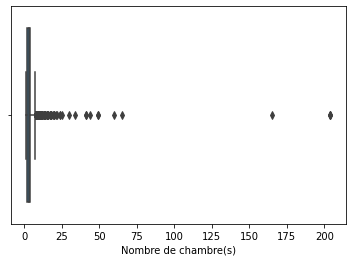

In [13]:
# affichage des outliers
sns.boxplot(x=df['Nombre de chambre(s)'])

A partir de la je n'ai plus qu'a identifier les outliers et filtrer mes lignes en conséquences

<AxesSubplot:xlabel='Nombre de chambre(s)'>

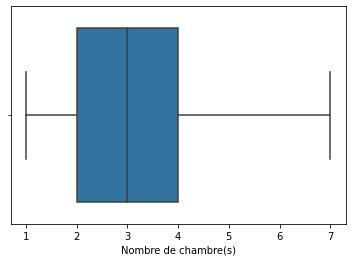

In [14]:
df = df[(df['Nombre de chambre(s)'] < 8) & (df['Nombre de chambre(s)'] > 0)]
sns.boxplot(x=df['Nombre de chambre(s)'])

In [15]:
#Voilà c'est beaucoup mieux !
print(df['Nombre de chambre(s)'].value_counts())
df.shape

3    5822
2    5450
4    2674
1    1736
5    1178
6     532
7     188
Name: Nombre de chambre(s), dtype: int64


(17580, 23)

In [16]:
df.dtypes

Unnamed: 0                           int64
Prix                                object
Type de propriété                   object
Vente publique                        bool
Immeuble de rapport                   bool
Bien neuf                             bool
Code Postal                          int64
Ville                               object
Sous-type de propriété              object
Nombre de façades                   object
Etat du bâtiment                    object
Surface habitable                   object
Nombre de chambre(s)                 int64
Type de cuisine                     object
Feu ouvert                            bool
Meublé                                bool
Jardin                                bool
Surface du jardin                   object
Terrasse                              bool
Surface de la terrasse              object
Surface totale du terrain           object
Piscine                               bool
Surface de la zone constructible    object
dtype: obje

Il faut ensuite faire pareille pour le reste...